In [35]:
import pandas as pd
import numpy as np
import random as r
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('/kaggle/input/steel-industry-data/Occupancy_Estimation.csv')

In [37]:
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [39]:
data.drop(['Date', 'Time'], axis=1, inplace=True)

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop(columns=['Room_Occupancy_Count'])
Y = data['Room_Occupancy_Count']

Scalar = StandardScaler()
Scalar.fit_transform(X)

samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random

def fitnessFunction(kernel, C, gamma):
    svm = SVC(kernel=kernel, C=C, gamma=gamma,max_iter = 100)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return accuracy_score(y_pred, y_test)

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
bestAccuracy = []
bestKernel = []
bestC = []
bestGamma = []
iteration = 100
convergence_scores = []
convergence_graph = []

for i in range(len(samples)):
    best_accuracy= 0
    best_C = 0
    best_gamma = 0
    best_kernel = None
    for k in kernel:
        X_train_random, X_test_random, y_train_random, y_test_random = samples[i]
        C = np.random.uniform(0, 10)
        gamma = np.random.uniform(0, 10)
        score = fitnessFunction(k, C, gamma)
        if score>best_accuracy:
            best_accuracy = round(score,2)
            best_C = round(C,2)
            best_gamma = round(gamma, 2)
            best_kernel  = k
        convergence_scores.append(score) 
    bestAccuracy.append(best_accuracy)
    bestC.append(best_C)
    bestGamma.append(best_gamma)
    bestKernel.append(best_kernel)
    convergence_graph.append(convergence_scores)
    print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best C = ', C, 'Best Gamma = ', gamma)

Best Accuracy =  0.94 Best Kernel =  poly Best C =  3.4145220139417853 Best Gamma =  5.172978484303047
Best Accuracy =  0.92 Best Kernel =  linear Best C =  9.531060245850561 Best Gamma =  8.60700822412855
Best Accuracy =  0.95 Best Kernel =  poly Best C =  7.801897360325145 Best Gamma =  7.903860375199714
Best Accuracy =  0.92 Best Kernel =  linear Best C =  5.917409269100627 Best Gamma =  9.872671073030496
Best Accuracy =  0.92 Best Kernel =  linear Best C =  5.288951081071365 Best Gamma =  1.3535344957274853
Best Accuracy =  0.92 Best Kernel =  linear Best C =  1.0370668699860375 Best Gamma =  7.914168013333997
Best Accuracy =  0.92 Best Kernel =  linear Best C =  6.249755630572472 Best Gamma =  3.1733369142175984
Best Accuracy =  0.92 Best Kernel =  linear Best C =  0.9364811024135344 Best Gamma =  3.8187003275986955
Best Accuracy =  0.92 Best Kernel =  linear Best C =  3.9769993657170355 Best Gamma =  8.066177593368254
Best Accuracy =  0.92 Best Kernel =  linear Best C =  0.315911

In [46]:
data = {
    'Sample': ['Sample'+str(i+1) for i in range(len(samples))],
    'BestAccuracy': bestAccuracy,
    'BestC': bestC,
    'BestGamma': bestGamma,
    'BestKernel': bestKernel
}
df = pd.DataFrame(data)
print(df)

     Sample  BestAccuracy  BestC  BestGamma BestKernel
0   Sample1          0.94   8.44       4.83       poly
1   Sample2          0.92   1.63       5.27     linear
2   Sample3          0.95   4.44       1.88       poly
3   Sample4          0.92   5.08       6.93     linear
4   Sample5          0.92   2.09       2.90     linear
5   Sample6          0.92   5.75       9.05     linear
6   Sample7          0.92   4.25       6.45     linear
7   Sample8          0.92   5.75       2.89     linear
8   Sample9          0.92   7.93       2.95     linear
9  Sample10          0.92   5.47       4.64     linear


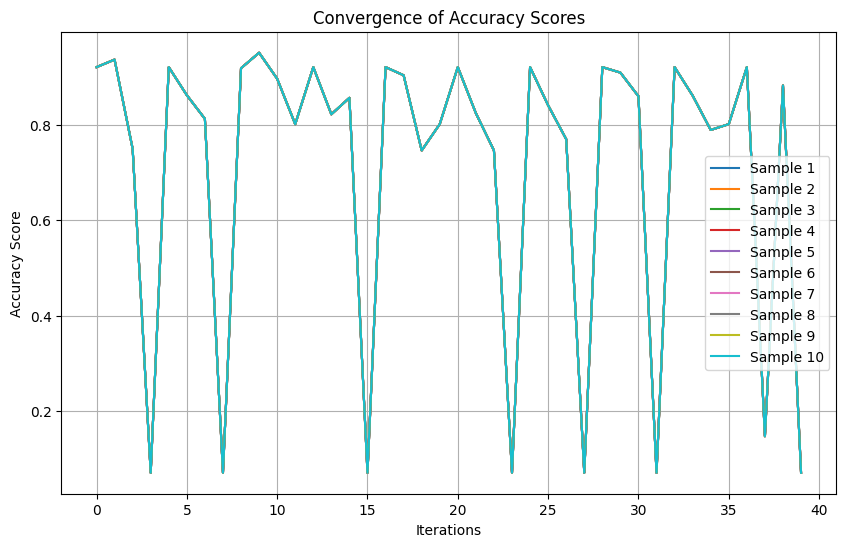

In [47]:
# Plot convergence graph
plt.figure(figsize=(10, 6))
for i, scores in enumerate(convergence_graph):
    plt.plot(scores, label=f'Sample {i+1}')
plt.xlabel('Iterations')
plt.ylabel('Accuracy Score')
plt.title('Convergence of Accuracy Scores')
plt.legend()
plt.grid(True)
plt.show()